# 1 - Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# 2 - Read the Dataset

In [ ]:
# Mount Google Drive to access all files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RFL_data = pd.read_csv("/content/drive/MyDrive/DS Capstone/Dataset/RFLData.csv")
FSO_data = pd.read_csv("/content/drive/MyDrive/DS Capstone/Dataset/FSOData.csv")


In [ ]:
# Remove unncessary columns
RFL_data = RFL_data.iloc[:, :11]
# Remove negative value in RFL_Att column
RFL_data['RFL_Att'] = RFL_data['RFL_Att'].apply(lambda x: x if x >= 0 else None)
RFL_data.describe()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP Code
count,111040.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,1.110410e+05,111041.000000,111041.000000,111041.000000
mean,12.081499,12.916485,78.788240,29580.656942,-0.108868,10.146837,11.244324,7.850797e+10,3348.651709,0.530645,2.647518
std,4.089172,9.505956,17.514275,24892.579354,0.840872,6.162120,7.000356,5.000016e+09,1208.521498,3.244773,2.935448
min,0.073229,-6.915637,8.898742,11.181315,-11.157000,1.069317,0.000000,7.350000e+10,2012.000061,0.000000,0.000000
25%,10.794716,4.506938,70.171059,8189.281266,-0.425000,5.080780,5.000000,7.350000e+10,2020.893485,0.000000,0.000000
50%,11.920906,11.060456,83.318654,21737.387580,-0.100000,7.272890,11.000000,8.350000e+10,2961.074365,0.000000,0.000000
75%,13.399272,22.500517,92.286500,47915.829960,0.230000,16.604670,17.000000,8.350000e+10,4820.945766,0.119594,6.000000
max,48.392563,36.734515,99.499857,75004.999240,13.630000,24.985184,23.000000,8.350000e+10,4827.999868,131.801891,8.000000


In [ ]:
# Remove unncessary columns
FSO_data = FSO_data.iloc[:, :11]
# Remove negative value in RFL_Att column
FSO_data['FSO_Att'] = FSO_data['FSO_Att'].apply(lambda x: x if x >= 0 else None)
FSO_data.describe()

,FSO_Att,Absolute Humidity,Wind Speed,Visibility,Time,Wind Speed Max,Temperature,Temperature Difference,Particulate,Distance,SYNOP Code
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,9.553919,0.739065,32986.417484,11.373193,1.851020,12.536912,-0.065506,27.065979,3297.930328,2.213101
std,3.903843,5.858577,0.871314,24713.874445,6.942229,1.762698,9.132673,0.798295,72.134023,1224.305893,2.879657
min,0.788363,1.141556,0.000000,10.151990,0.000000,0.000000,-6.894074,-11.157000,0.000000,2012.000148,0.000000
25%,3.473063,4.958993,0.076749,11158.598400,5.000000,0.512667,4.675576,-0.400000,0.000000,2019.431812,0.000000
50%,6.336167,6.870737,0.437995,26378.636210,11.000000,1.323101,10.276256,-0.100000,0.000000,2959.863686,0.000000
75%,8.664984,14.049470,1.088621,53493.821285,17.000000,2.681788,21.473233,0.250000,16.947618,4820.890157,6.000000
max,32.455222,24.790883,7.799086,75004.999150,23.000000,16.421115,37.257974,13.630000,1621.001906,4827.999971,8.000000


In [ ]:
print("RFL Data shape:",RFL_data.shape)
print("FSO Data shape:",FSO_data.shape)

RFL Data shape: (111041, 11)
FSO Data shape: (91379, 11)


In [ ]:
# Encode SYNOP Code column
RFL_data = pd.concat([RFL_data, pd.get_dummies(RFL_data["SYNOP Code"], prefix="SYNOP")], axis=1)
RFL_data.drop("SYNOP Code", axis = 1, inplace = True)
RFL_data.head()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,73500000000,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,73500000000,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,73500000000,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,73500000000,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,73500000000,2115.840072,0.0,1,0,0,0,0,0,0


In [ ]:
RFL_data['Frequency'] = RFL_data['Frequency'] / 10000000000
RFL_data.head()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,7.35,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,7.35,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,7.35,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,7.35,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,7.35,2115.840072,0.0,1,0,0,0,0,0,0


In [ ]:
# Encode SYNOP Code column
FSO_data = pd.concat([FSO_data, pd.get_dummies(FSO_data["SYNOP Code"], prefix="SYNOP")], axis=1)
FSO_data.drop("SYNOP Code", axis = 1, inplace = True)
FSO_data.head()

,FSO_Att,Absolute Humidity,Wind Speed,Visibility,Time,Wind Speed Max,Temperature,Temperature Difference,Particulate,Distance,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,7.913289,17.595709,3.057066,65884.51846,9,6.863808,26.067846,13.63,0.0,2115.338398,1,0,0,0,0,0,0
1,7.451176,17.549693,2.727910,64963.41092,9,6.468903,25.645703,-0.54,0.0,2113.999257,1,0,0,0,0,0,0
2,7.072747,17.290230,1.674810,54794.28107,10,2.826916,25.653383,-0.24,0.0,2118.689047,1,0,0,0,0,0,0
3,6.949288,16.820880,0.962068,50205.64159,10,2.780643,25.646271,-0.16,0.0,2114.632339,1,0,0,0,0,0,0
4,7.361052,16.813820,1.881007,59038.32599,10,4.476298,25.673089,-0.10,0.0,2116.786055,1,0,0,0,0,0,0


In [ ]:
# Check if any missing values
RFL_data.isna().sum()

RFL_Att                   1
Temperature               0
Relative Humidity         0
Visibility (m)            0
Temperature Difference    0
Absolute Humidity         0
Time                      0
Frequency                 0
Distance                  0
Rain Intensity            0
SYNOP_0                   0
SYNOP_3                   0
SYNOP_4                   0
SYNOP_5                   0
SYNOP_6                   0
SYNOP_7                   0
SYNOP_8                   0
dtype: int64

In [ ]:
RFL_data = RFL_data.dropna()

In [ ]:
# Check if any missing values
FSO_data.isna().sum()

FSO_Att                   0
Absolute Humidity         0
Wind Speed                0
Visibility                0
Time                      0
Wind Speed Max            0
Temperature               0
Temperature Difference    0
Particulate               0
Distance                  0
SYNOP_0                   0
SYNOP_3                   0
SYNOP_4                   0
SYNOP_5                   0
SYNOP_6                   0
SYNOP_7                   0
SYNOP_8                   0
dtype: int64

# 3 - Analyse and Visualise Dataset

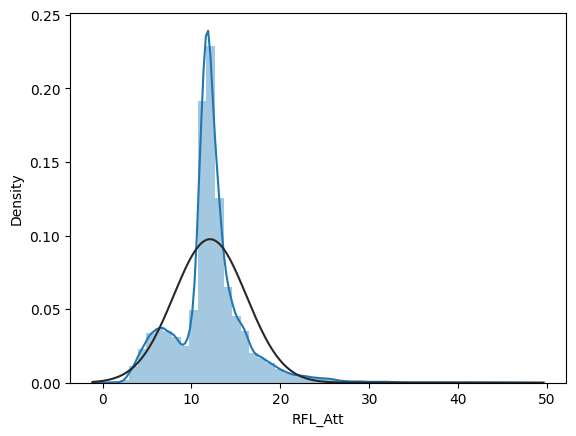

In [ ]:
sns.distplot(RFL_data['RFL_Att'], fit = norm)
plt.show()

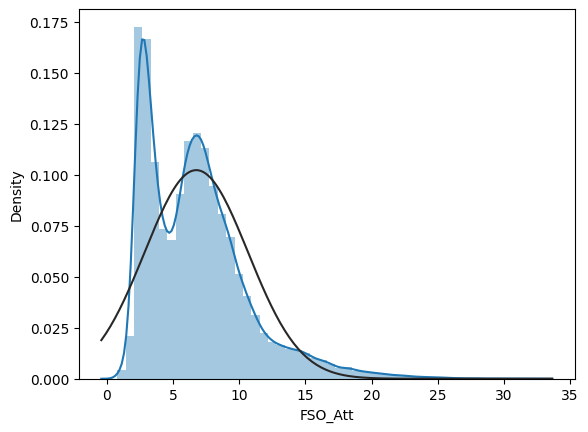

In [ ]:
sns.distplot(FSO_data['FSO_Att'], fit = norm)
plt.show()

In [ ]:
def summary_charts(data):
    features = [col for col in data.columns if ('SYNOP' not in col)]
    data[features].hist(figsize=(12, 10), bins=100, edgecolor='black')
    plt.tight_layout()
    plt.show()


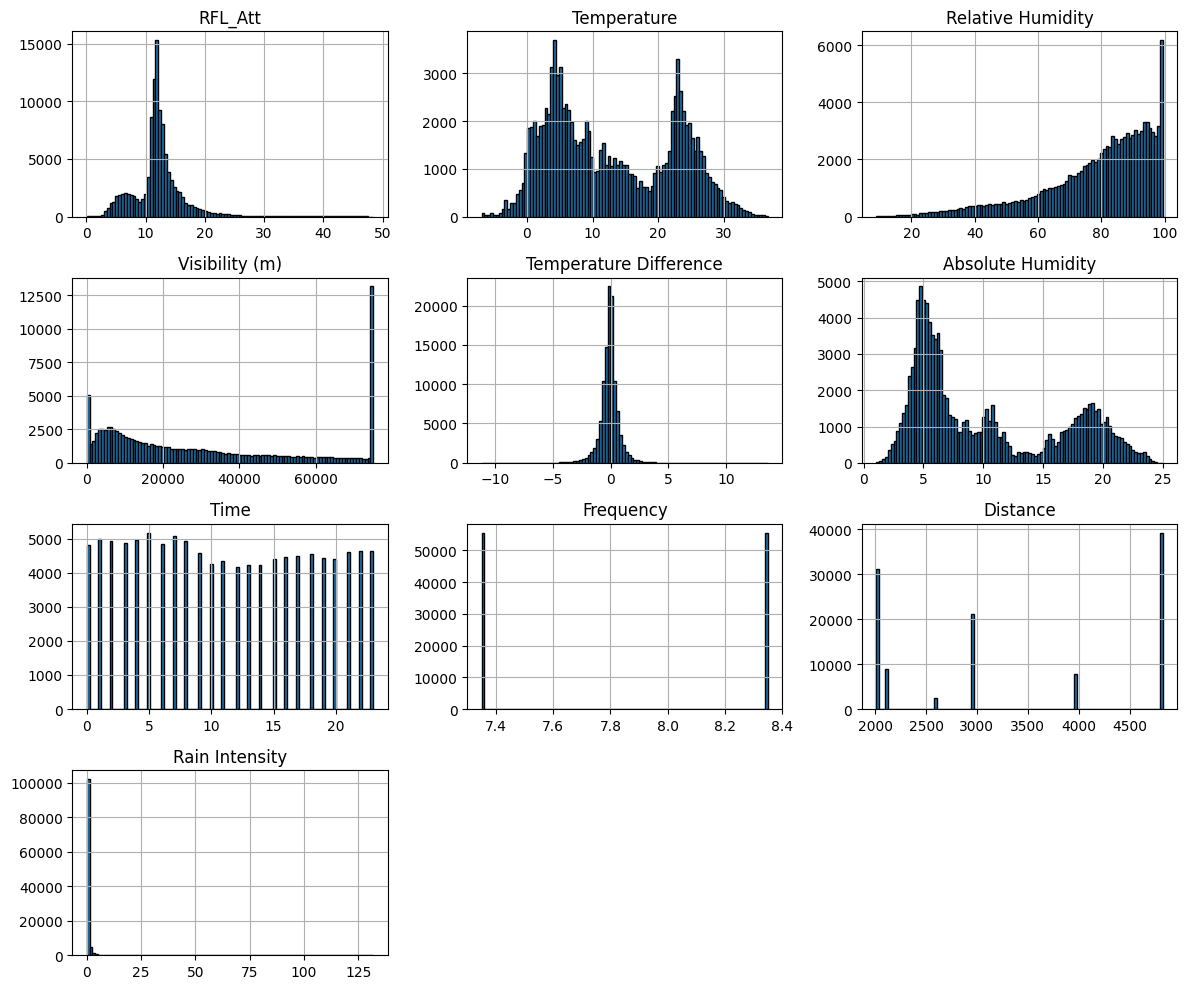

In [ ]:
summary_charts(RFL_data)

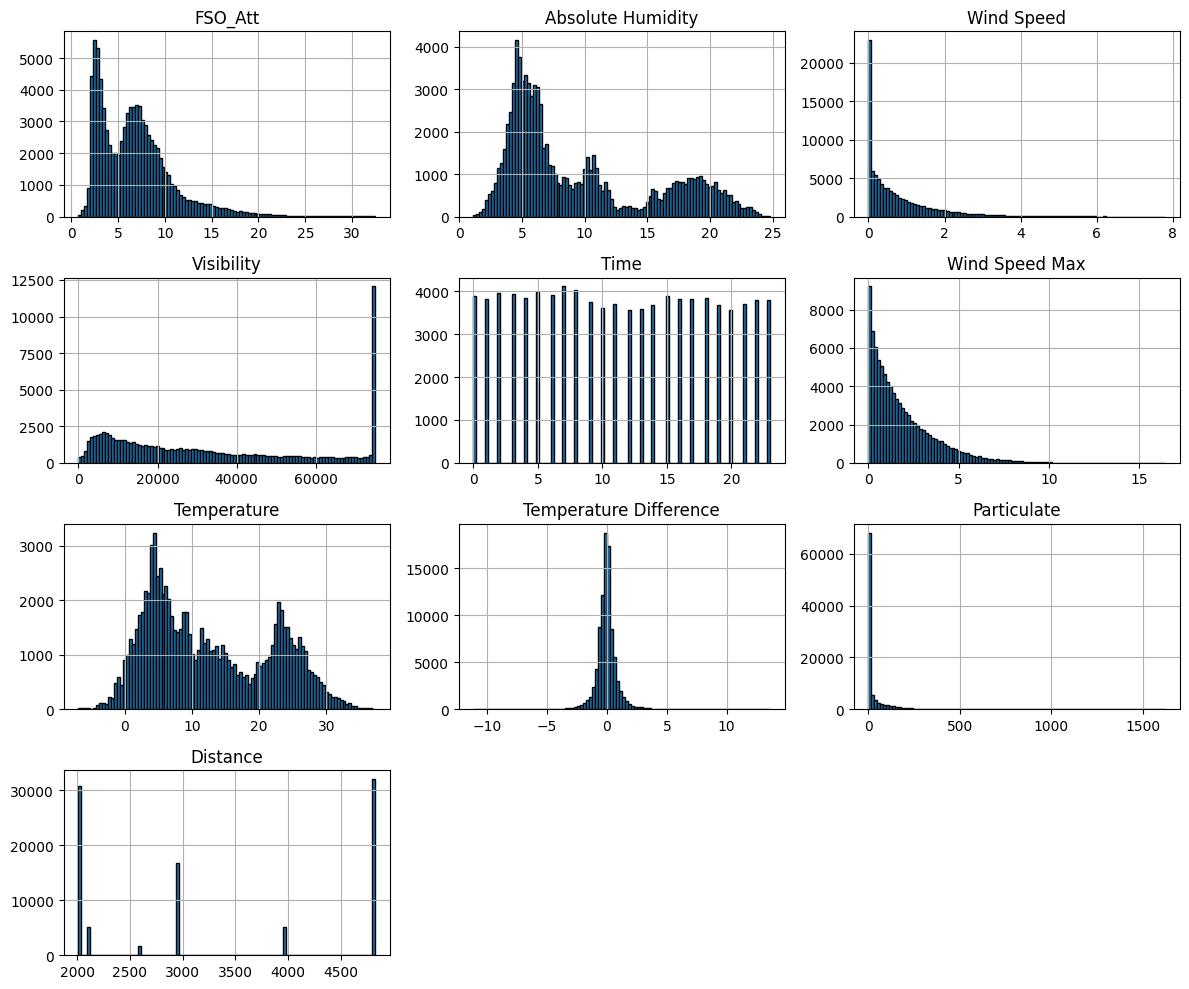

In [ ]:
summary_charts(FSO_data)

In [ ]:
columns_RFL = ['RFL_Att','Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time']
corr_RFL = RFL_data[columns_RFL].corr()
corr_RFL.style.background_gradient(cmap='coolwarm')

,RFL_Att,Rain Intensity,Temperature,Distance,Visibility (m),Absolute Humidity,SYNOP_0,Relative Humidity,Temperature Difference,Time
RFL_Att,1.000000,0.470993,-0.309068,0.157374,-0.377559,-0.214859,-0.451777,0.267406,-0.153935,-0.072877
Rain Intensity,0.470993,1.000000,0.088373,-0.077048,-0.167414,0.139340,-0.173627,0.125348,-0.146601,-0.003960
Temperature,-0.309068,0.088373,1.000000,-0.432239,0.019516,0.903330,0.058193,-0.145625,-0.013474,0.053491
Distance,0.157374,-0.077048,-0.432239,1.000000,0.087676,-0.297797,-0.022679,0.188202,0.021487,-0.046630
Visibility (m),-0.377559,-0.167414,0.019516,0.087676,1.000000,-0.204165,0.471994,-0.568846,0.106737,0.038614
Absolute Humidity,-0.214859,0.139340,0.903330,-0.297797,-0.204165,1.000000,-0.116490,0.243041,-0.062588,0.034356
SYNOP_0,-0.451777,-0.173627,0.058193,-0.022679,0.471994,-0.116490,1.000000,-0.502040,0.160601,0.042714
Relative Humidity,0.267406,0.125348,-0.145625,0.188202,-0.568846,0.243041,-0.502040,1.000000,-0.116209,-0.042823
Temperature Difference,-0.153935,-0.146601,-0.013474,0.021487,0.106737,-0.062588,0.160601,-0.116209,1.000000,-0.095216
Time,-0.072877,-0.003960,0.053491,-0.046630,0.038614,0.034356,0.042714,-0.042823,-0.095216,1.000000


In [ ]:
columns_FSO = ['FSO_Att','Distance', 'Visibility', 'Temperature', 'Particulate', 'Absolute Humidity', 'Time', 'Temperature Difference', 'Wind Speed Max', 'Wind Speed', 'SYNOP_3']
corr_FSO = FSO_data[columns_FSO].corr()
corr_FSO.style.background_gradient(cmap='coolwarm')

,FSO_Att,Distance,Visibility,Temperature,Particulate,Absolute Humidity,Time,Temperature Difference,Wind Speed Max,Wind Speed,SYNOP_3
FSO_Att,1.000000,0.244021,-0.367476,0.074565,0.394289,0.263335,-0.095579,-0.047587,0.074161,0.030314,0.077726
Distance,0.244021,1.000000,0.157902,-0.398197,-0.138530,-0.255335,-0.028499,0.018272,0.007152,-0.120504,-0.003801
Visibility,-0.367476,0.157902,1.000000,0.004099,-0.375510,-0.205020,0.021912,0.077748,-0.004939,-0.028202,-0.049720
Temperature,0.074565,-0.398197,0.004099,1.000000,0.037766,0.894028,0.029316,0.018465,-0.019946,0.056546,-0.011717
Particulate,0.394289,-0.138530,-0.375510,0.037766,1.000000,0.140283,-0.011057,-0.127468,0.170474,0.114442,-0.017173
Absolute Humidity,0.263335,-0.255335,-0.205020,0.894028,0.140283,1.000000,0.011129,-0.027846,-0.006210,0.060465,0.003167
Time,-0.095579,-0.028499,0.021912,0.029316,-0.011057,0.011129,1.000000,-0.112431,-0.018409,0.032690,-0.013781
Temperature Difference,-0.047587,0.018272,0.077748,0.018465,-0.127468,-0.027846,-0.112431,1.000000,-0.039062,-0.084560,0.005411
Wind Speed Max,0.074161,0.007152,-0.004939,-0.019946,0.170474,-0.006210,-0.018409,-0.039062,1.000000,0.753440,-0.024731
Wind Speed,0.030314,-0.120504,-0.028202,0.056546,0.114442,0.060465,0.032690,-0.084560,0.753440,1.000000,-0.022726


In [ ]:
features = [x for x in RFL_data.columns if x != 'RFL_Att']
features

['Temperature',
 'Relative Humidity',
 'Visibility (m)',
 'Temperature Difference',
 'Absolute Humidity',
 'Time',
 'Frequency',
 'Distance',
 'Rain Intensity',
 'SYNOP_0',
 'SYNOP_3',
 'SYNOP_4',
 'SYNOP_5',
 'SYNOP_6',
 'SYNOP_7',
 'SYNOP_8']

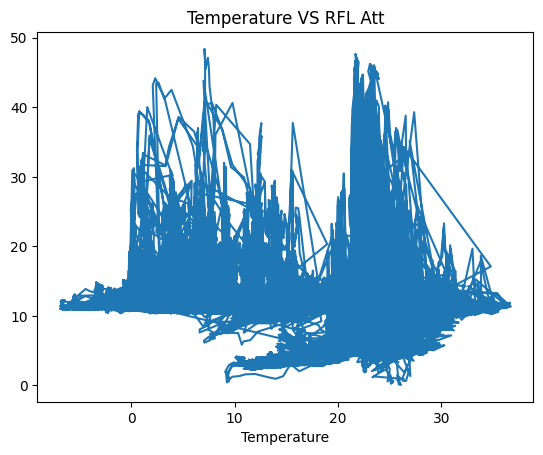

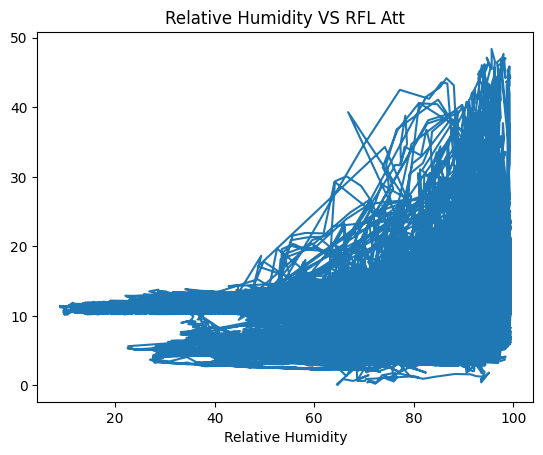

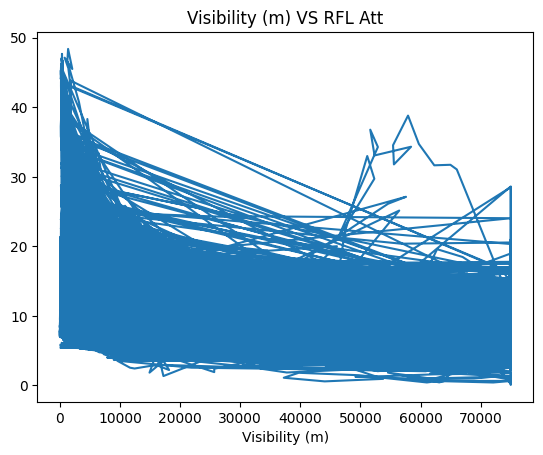

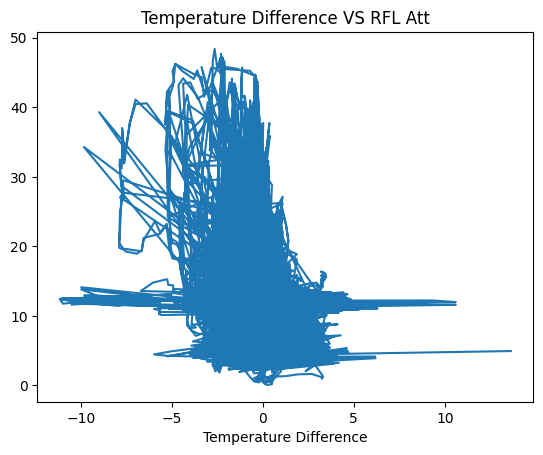

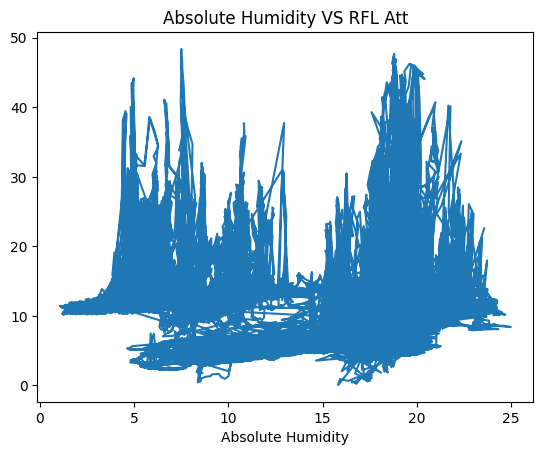

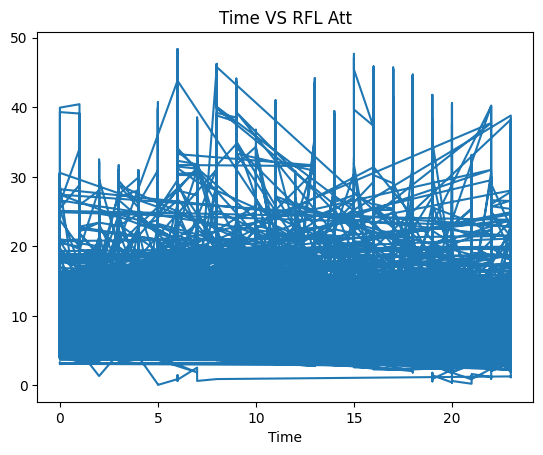

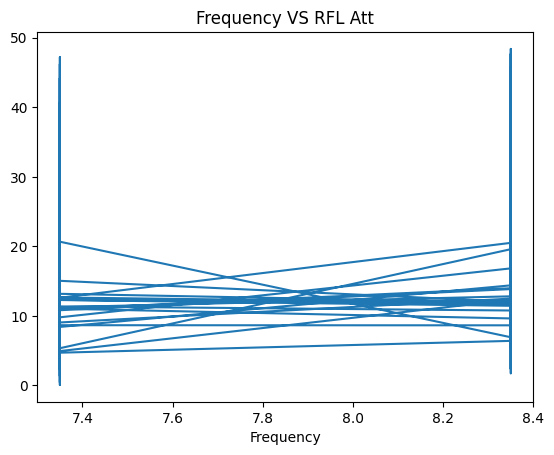

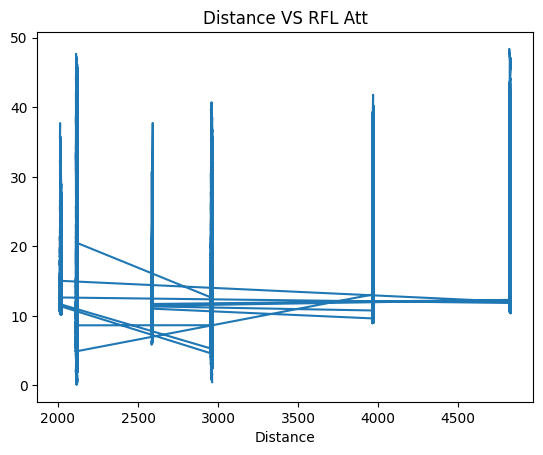

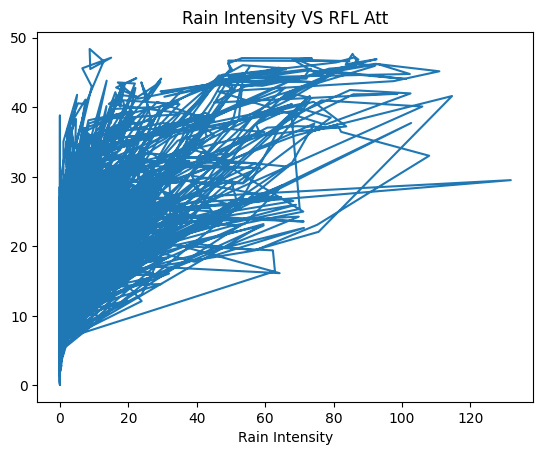

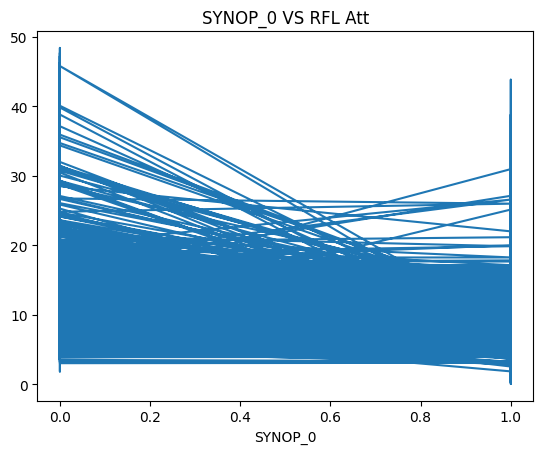

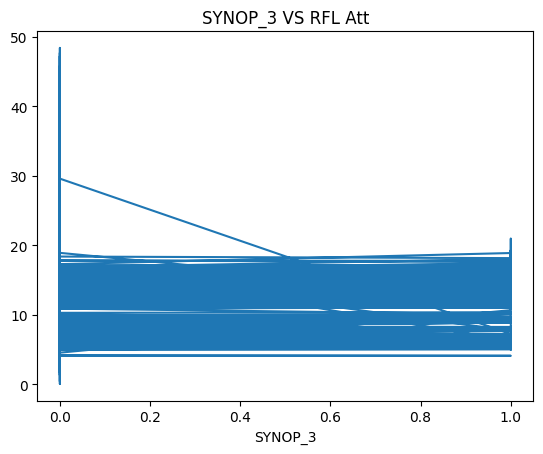

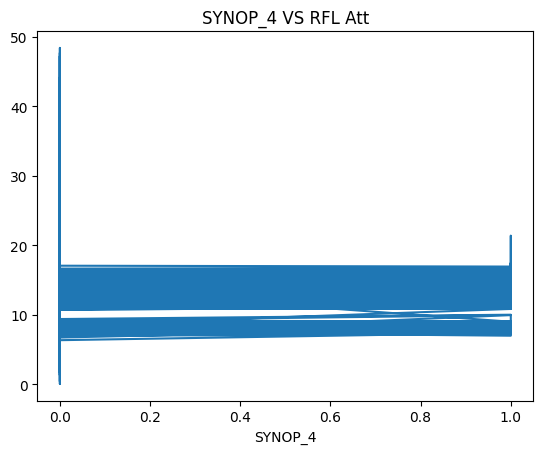

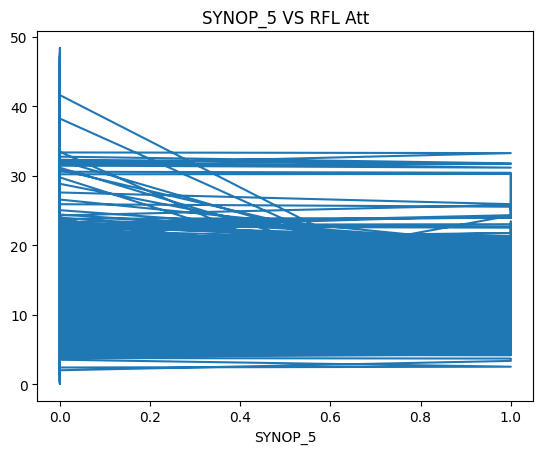

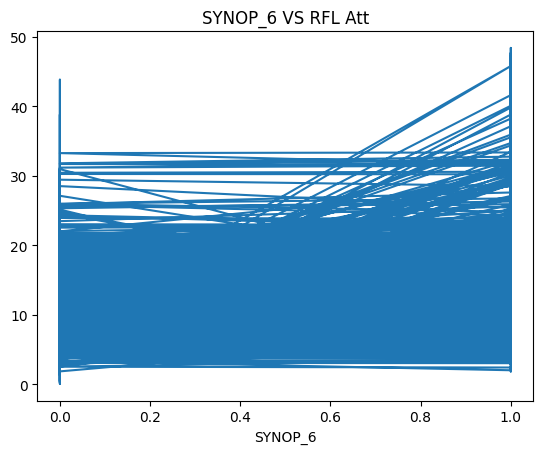

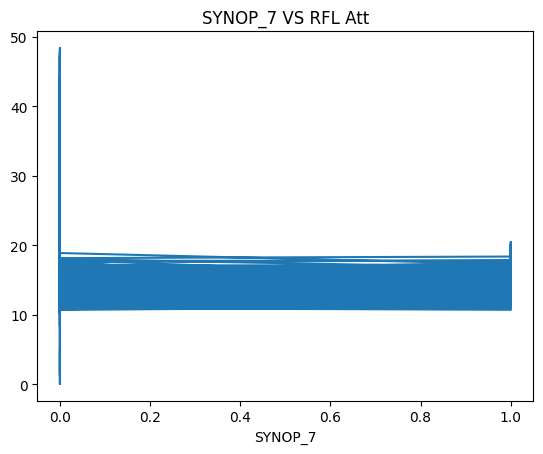

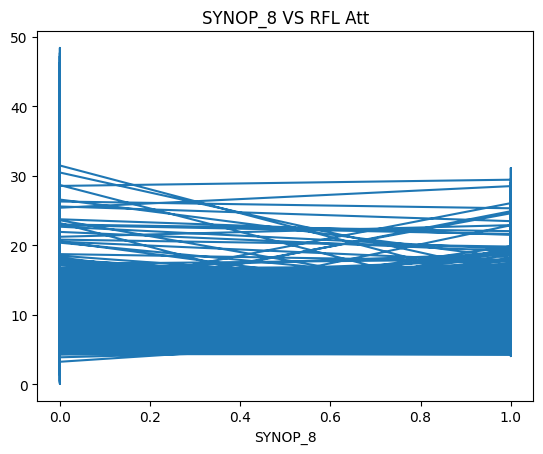

In [ ]:
def plot_relationship(x,y, title, x_label):
    plt.plot(x,y)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()

for feature in features:
    plot_relationship(RFL_data[feature] ,RFL_data['RFL_Att'], f'{feature} VS RFL Att', feature)


# 4 - Model Implementation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html






In [ ]:
def perform_random_forest_regression(X, y, param_grid, cv, plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    feature_scaler = StandardScaler().fit(X_train)
    target_scaler = StandardScaler().fit(y_train)
    X_train = feature_scaler.transform(X_train)
    X_test = feature_scaler.transform(X_test)
    y_train = target_scaler.transform(y_train)

    regressor = RandomForestRegressor(random_state=0, oob_score=True, n_jobs=4)
    grid_regr = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = cv)
    grid_regr.fit(X_train, y_train)

    model = grid_regr.best_estimator_
    best_params = grid_regr.best_params_

    # estimator.feature_importances_
    y_pred = model.predict(X_test).reshape(-1,1)
    # inverse transform
    y_pred = target_scaler.inverse_transform(y_pred)

    rmse = mean_squared_error(y_test, y_pred , squared=False)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    feature_importances = list(zip(X.columns, model.feature_importances_))
    feature_importances.sort(key = lambda x : x[1])

    df_features = pd.DataFrame(feature_importances, columns=["feature","importance"])

    features_sorted_by_importance = list(df_features.sort_values(by=["importance"], ascending=False)["feature"])
    print('Features count, ', len(features_sorted_by_importance) ,' features_sorted_by_importance ', features_sorted_by_importance)

    least_important_feature = None
    if len(df_features) >= 1:
       least_important_feature = df_features.sort_values(by=["importance"], ascending=True)['feature'][0]

    if plot:
        plt.barh([x[0] for x in feature_importances],[x[1] for x in feature_importances])
        plt.show()

    return {"best_params ": best_params,
            "rmse": rmse,
            "mse": mse,
            "mae": mae,
            "r2" : r2,
            "feature_importances": model.feature_importances_,
            "features": list(X.columns),
            "number_of_features": len(X.columns),
            "least_important_feature": least_important_feature,
            "feature_importance_df": df_features}

def process_data(process_df, target_column_name):
    # Remove unncessary columns
    process_df = process_df.iloc[:, :11]

    # Remove negative value in target columns (RFL_Att, FSO_Att ) column
    process_df[target_column_name] = process_df[target_column_name].apply(lambda x: x if x >= 0 else None)

    # Encode SYNOP Code column
    process_df = pd.concat([process_df, pd.get_dummies(process_df["SYNOP Code"], prefix="SYNOP")], axis=1)
    process_df.drop("SYNOP Code", axis = 1, inplace = True)

    process_df = process_df.dropna()

    return process_df

def preprocess_rfl_data(RFL_data):
    RFL_data['Frequency'] = RFL_data['Frequency'] / 10000000000
    return RFL_data

def peform_random_forest_regression_with_removing_least_important_features(file_path, data_type, target_column_name, param_grid, cv):
    data_df = pd.read_csv(file_path)
    data_df = process_data(data_df, target_column_name)

    if data_type == "RFL":
        data_df = preprocess_rfl_data(data_df)

    y = data_df[target_column_name]
    X = data_df.drop(columns=[target_column_name])

    features = list(X.columns)
    results = []
    while len(features) >= 1:
        print('\nRandom Forest len(features) ', len(features))
        result = perform_random_forest_regression(X, y, param_grid, cv)
        results.append(result)

        if result['least_important_feature']:
            X = X.drop(columns=[result['least_important_feature']])

        features = list(X.columns)

    return results



In [ ]:
file_path = '/content/drive/MyDrive/DS Capstone/Dataset/RFLData.csv'

param_grid = {
    'n_estimators': [10,100],
    'max_depth': [20, 100]
}

results = peform_random_forest_regression_with_removing_least_important_features(file_path, 'RFL', 'RFL_Att', param_grid, 3)
results_df = pd.DataFrame(results)
results_df.sort_values(by=["rmse"], ascending=True)


Random Forest len(features)  16
Features count,  16  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3', 'SYNOP_7', 'SYNOP_4']

Random Forest len(features)  15
Features count,  15  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3', 'SYNOP_7']

Random Forest len(features)  14
Features count,  14  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3']

Random Forest len(features)  13
Features count,  13  features_sorted_by_importance  ['R

,best_params,rmse,mse,mae,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
2,"{'max_depth': 100, 'n_estimators': 100}",0.692499,0.479555,0.345362,0.971709,"[0.1882549607899219, 0.0237661450173453, 0.062...","[Temperature, Relative Humidity, Visibility (m...",14,SYNOP_3,feature importance 0 ...
3,"{'max_depth': 100, 'n_estimators': 100}",0.693124,0.480421,0.345364,0.971658,"[0.18842682167520797, 0.023786853492586038, 0....","[Temperature, Relative Humidity, Visibility (m...",13,SYNOP_5,feature importance 0 ...
0,"{'max_depth': 100, 'n_estimators': 100}",0.693508,0.480953,0.345366,0.971626,"[0.18810329998879935, 0.023794824949921845, 0....","[Temperature, Relative Humidity, Visibility (m...",16,SYNOP_4,feature importance 0 ...
1,"{'max_depth': 100, 'n_estimators': 100}",0.693722,0.481250,0.345381,0.971609,"[0.18838391057632686, 0.02374021634995529, 0.0...","[Temperature, Relative Humidity, Visibility (m...",15,SYNOP_7,feature importance 0 ...
5,"{'max_depth': 100, 'n_estimators': 100}",0.693982,0.481611,0.345973,0.971587,"[0.18847564807467823, 0.023787604315359617, 0....","[Temperature, Relative Humidity, Visibility (m...",11,SYNOP_8,feature importance 0 ...
4,"{'max_depth': 100, 'n_estimators': 100}",0.694328,0.482092,0.345684,0.971559,"[0.18824214586094606, 0.023816832937701527, 0....","[Temperature, Relative Humidity, Visibility (m...",12,SYNOP_6,feature importance 0 ...
6,"{'max_depth': 100, 'n_estimators': 100}",0.696954,0.485744,0.346117,0.971344,"[0.18847238478596656, 0.023844788429656445, 0....","[Temperature, Relative Humidity, Visibility (m...",10,Frequency,feature importance 0 ...
7,"{'max_depth': 20, 'n_estimators': 100}",0.867822,0.753115,0.508003,0.955570,"[0.1902910544271183, 0.024582738649196495, 0.0...","[Temperature, Relative Humidity, Visibility (m...",9,Time,feature importance 0 ...
8,"{'max_depth': 20, 'n_estimators': 100}",0.928724,0.862528,0.538999,0.949115,"[0.19284727488335046, 0.02676297323750824, 0.0...","[Temperature, Relative Humidity, Visibility (m...",8,Temperature Difference,feature importance 0 Tempe...
9,"{'max_depth': 20, 'n_estimators': 100}",1.019816,1.040024,0.578511,0.938644,"[0.19670713416020225, 0.02964034887090095, 0.0...","[Temperature, Relative Humidity, Visibility (m...",7,Relative Humidity,feature importance 0 Relative H...


In [ ]:
results_df['feature_importance_df'][0].sort_values(by=["importance"], ascending=False)

,feature,importance
15,Rain Intensity,0.429092
14,Temperature,0.188103
13,Distance,0.151147
12,Visibility (m),0.062946
11,Absolute Humidity,0.060798
10,SYNOP_0,0.041657
9,Relative Humidity,0.023795
8,Temperature Difference,0.016328
7,Time,0.013172
6,Frequency,0.011498


In [ ]:
rfl_sorted_by_num_features = results_df.sort_values(by=["number_of_features"], ascending=True)
rfl_sorted_by_num_features

,best_params,rmse,mse,mae,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
15,"{'max_depth': 20, 'n_estimators': 100}",3.145146,9.891946,2.307194,0.416426,[1.0],[Rain Intensity],1,Rain Intensity,feature importance 0 Rain Intensit...
14,"{'max_depth': 20, 'n_estimators': 100}",2.341159,5.481028,1.524338,0.676647,"[0.40833018908799074, 0.5916698109120093]","[Temperature, Rain Intensity]",2,Temperature,feature importance 0 Temperatur...
13,"{'max_depth': 20, 'n_estimators': 100}",1.625088,2.640912,0.967691,0.844200,"[0.2667482849932829, 0.2116916537306507, 0.521...","[Temperature, Distance, Rain Intensity]",3,Distance,feature importance 0 Distanc...
12,"{'max_depth': 20, 'n_estimators': 100}",1.246209,1.553037,0.725048,0.908379,"[0.24014901420263693, 0.10601637727431289, 0.1...","[Temperature, Visibility (m), Distance, Rain I...",4,Visibility (m),feature importance 0 Visibility (m...
11,"{'max_depth': 20, 'n_estimators': 100}",1.056255,1.115674,0.592276,0.934181,"[0.20695155757055023, 0.0898130789315414, 0.07...","[Temperature, Visibility (m), Absolute Humidit...",5,Absolute Humidity,feature importance 0 Absolute H...
10,"{'max_depth': 20, 'n_estimators': 100}",1.055356,1.113777,0.592370,0.934293,"[0.2067713702398564, 0.07714434253371295, 0.07...","[Temperature, Visibility (m), Absolute Humidit...",6,SYNOP_0,feature importance 0 ...
9,"{'max_depth': 20, 'n_estimators': 100}",1.019816,1.040024,0.578511,0.938644,"[0.19670713416020225, 0.02964034887090095, 0.0...","[Temperature, Relative Humidity, Visibility (m...",7,Relative Humidity,feature importance 0 Relative H...
8,"{'max_depth': 20, 'n_estimators': 100}",0.928724,0.862528,0.538999,0.949115,"[0.19284727488335046, 0.02676297323750824, 0.0...","[Temperature, Relative Humidity, Visibility (m...",8,Temperature Difference,feature importance 0 Tempe...
7,"{'max_depth': 20, 'n_estimators': 100}",0.867822,0.753115,0.508003,0.955570,"[0.1902910544271183, 0.024582738649196495, 0.0...","[Temperature, Relative Humidity, Visibility (m...",9,Time,feature importance 0 ...
6,"{'max_depth': 100, 'n_estimators': 100}",0.696954,0.485744,0.346117,0.971344,"[0.18847238478596656, 0.023844788429656445, 0....","[Temperature, Relative Humidity, Visibility (m...",10,Frequency,feature importance 0 ...


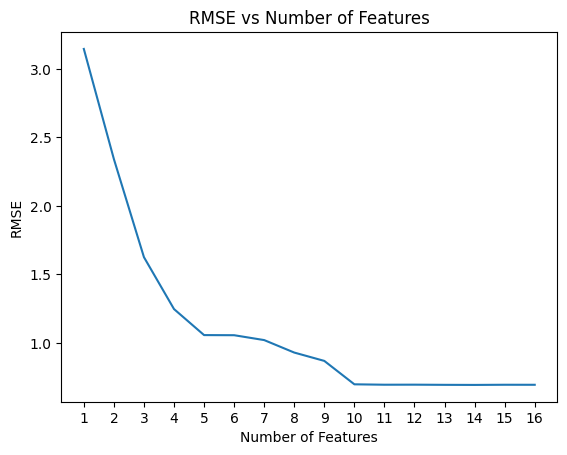

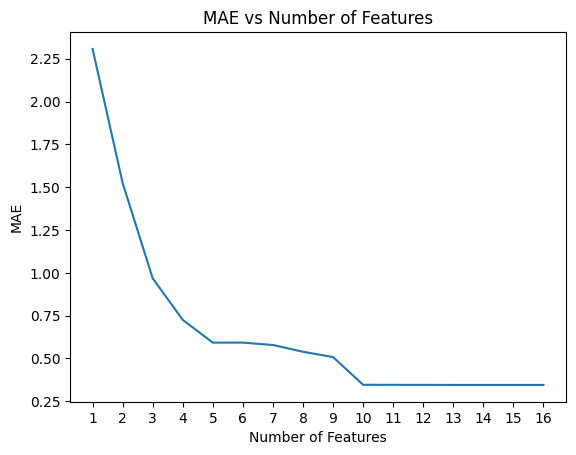

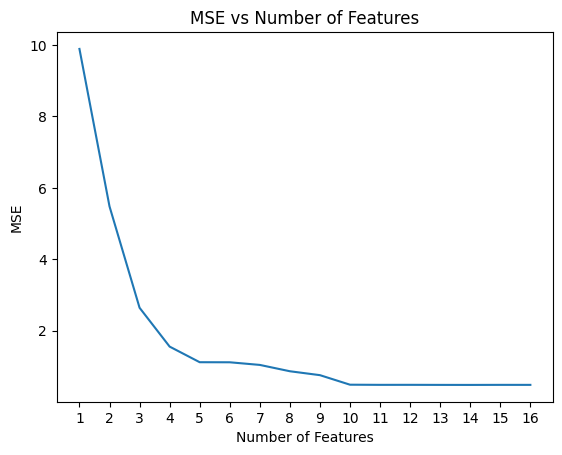

In [ ]:
import matplotlib.pyplot as plt
def plot_error_plot(rmse_list, title, y_label):
    x = range(1,17)
    plt.plot(x, rmse_list)
    plt.xticks(x)
    plt.xlabel('Number of Features')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_error_plot(rfl_sorted_by_num_features['rmse'], 'RMSE vs Number of Features', 'RMSE')
plot_error_plot(rfl_sorted_by_num_features['mae'], 'MAE vs Number of Features', 'MAE')
plot_error_plot(rfl_sorted_by_num_features['mse'], 'MSE vs Number of Features', 'MSE')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(data, x_labels, y_labels, title, cmap='viridis'):
    plt.figure(figsize=(8, 6))
    plt.imshow(data, cmap=cmap, interpolation='nearest')

    plt.colorbar(label='Value')

    plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45)
    plt.yticks(np.arange(len(y_labels)), y_labels)

    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    plt.title(title)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_heatmap(data, x_labels, y_labels, title, cmap='viridis')

In [ ]:
file_path_fso = '/content/drive/MyDrive/DS Capstone/Dataset/FSOData.csv'

param_grid_fso = {
    'n_estimators': [10,100],
    'max_depth': [20, 100]
}

results_fso = peform_random_forest_regression_with_removing_least_important_features(file_path_fso, 'FSO', 'FSO_Att', param_grid_fso, 3)
results_fso_df = pd.DataFrame(results_fso)
results_fso_df.sort_values(by=["rmse"], ascending=True)

In [ ]:
file_path_fso = '/content/drive/MyDrive/DS Capstone/Dataset/FSOData.csv'

param_grid_fso = {
    'n_estimators': [10],
    'max_depth': [2]
}

results_fso = peform_random_forest_regression_with_removing_least_important_features(file_path_fso, 'FSO', 'FSO_Att', param_grid_fso, 3)
results_fso_df = pd.DataFrame(results_fso)
results_fso_df.sort_values(by=["rmse"], ascending=True)

In [ ]:
results_fso_df['feature_importance_df'][0].sort_values(by=["importance"], ascending=False)

In [ ]:
fso_sorted_by_num_features = results_fso_df.sort_values(by=["number_of_features"], ascending=True)
# fso_sorted_by_num_features
plot_error_plot(fso_sorted_by_num_features['rmse'], 'RMSE vs Number of Features', 'RMSE')
plot_error_plot(fso_sorted_by_num_features['mae'], 'MAE vs Number of Features', 'MAE')
plot_error_plot(fso_sorted_by_num_features['mse'], 'MSE vs Number of Features', 'MSE')

In [ ]:
file_path_rfl = '/content/drive/MyDrive/DS Capstone/Dataset/RFLData.csv'

param_grid_rfl = {
    'n_estimators': [10],
    'max_depth': [2]
}

results_rfl = peform_random_forest_regression_with_removing_least_important_features(file_path_rfl, 'RFL', 'RFL_Att', param_grid_rfl, 3)
results_df_rfl = pd.DataFrame(results_rfl)
results_df_rfl.sort_values(by=["rmse"], ascending=True)

In [ ]:
results_df_rfl['feature_importance_df']

In [ ]:
results_df.sort_values(by=["number_of_features"], ascending=True)

In [ ]:
results["feature_importance_df"].sort_values(by=["importance"], ascending=True)